# Headers

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization
import matplotlib.pyplot as plt

%matplotlib inline

## Loading Dataset

In [6]:

data = pd.read_csv("iris.csv")

In [7]:
data.sample(n=5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
149,150,5.9,3.0,5.1,1.8,Iris-virginica
60,61,5.0,2.0,3.5,1.0,Iris-versicolor
90,91,5.5,2.6,4.4,1.2,Iris-versicolor
104,105,6.5,3.0,5.8,2.2,Iris-virginica
96,97,5.7,2.9,4.2,1.3,Iris-versicolor


# Exploring Data

## Describe

In [8]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Plotting

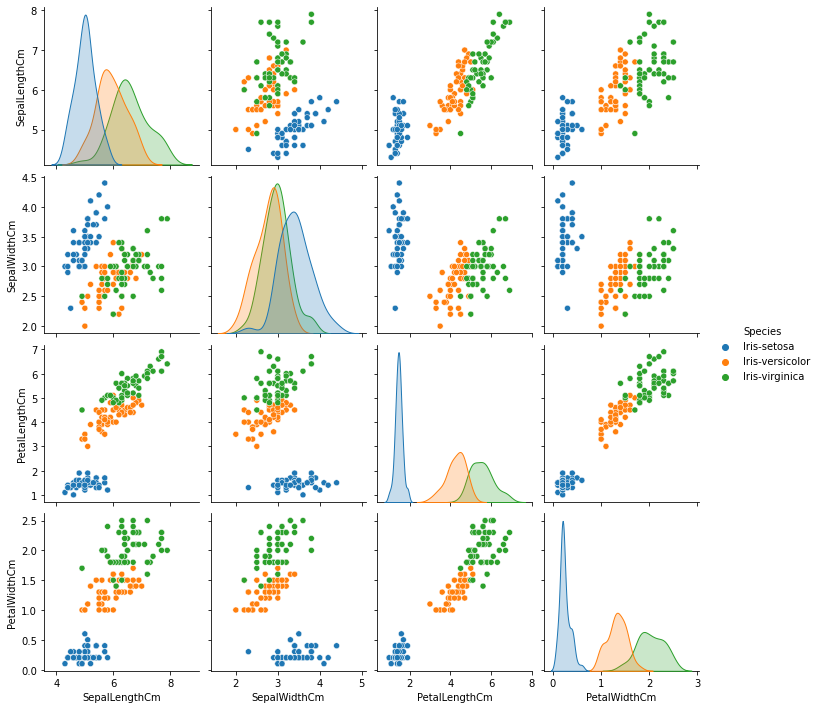

In [9]:
# simple visualization to show how the inputs compare against each other
sns.pairplot( data=data, vars=('SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'), hue='Species' )

## Normalization

In [10]:
df_norm = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_norm.sample(n=5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
117,0.944444,0.750000,0.966102,0.875000
77,0.666667,0.416667,0.677966,0.666667
114,0.416667,0.333333,0.694915,0.958333
48,0.277778,0.708333,0.084746,0.041667
70,0.444444,0.500000,0.644068,0.708333


In [11]:
df_norm.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


## Adding dummy values to target

In [12]:
target = data[['Species']].replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],[0,1,2])
target.sample(n=5)

,Species
148,2
20,0
26,0
51,1
27,0


In [13]:
df = pd.concat([df_norm, target], axis=1)
df.sample(n=5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
126,0.527778,0.333333,0.644068,0.708333,2
22,0.083333,0.666667,0.000000,0.041667,0
21,0.222222,0.708333,0.084746,0.125000,0
106,0.166667,0.208333,0.593220,0.666667,2
70,0.444444,0.500000,0.644068,0.708333,1


## Train Test Split

In [14]:
train_test_per = 90/100.0
df['train'] = np.random.rand(len(df)) < train_test_per
df.sample(n=5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,train
133,0.555556,0.333333,0.694915,0.583333,2,True
145,0.666667,0.416667,0.711864,0.916667,2,True
29,0.111111,0.500000,0.101695,0.041667,0,True
1,0.166667,0.416667,0.067797,0.041667,0,True
20,0.305556,0.583333,0.118644,0.041667,0,True


In [15]:
train = df[df.train == 1]
train = train.drop('train', axis=1).sample(frac=1)
train.sample(n=5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
130,0.861111,0.333333,0.864407,0.750000,2
45,0.138889,0.416667,0.067797,0.083333,0
87,0.555556,0.125000,0.576271,0.500000,1
35,0.194444,0.500000,0.033898,0.041667,0
133,0.555556,0.333333,0.694915,0.583333,2


In [16]:
test = df[df.train == 0]
test = test.drop('train', axis=1)
test.sample(n=5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,0.666667,0.458333,0.779661,0.958333,2
6,0.083333,0.583333,0.067797,0.083333,0
60,0.194444,0.000000,0.423729,0.375000,1
71,0.500000,0.333333,0.508475,0.500000,1
72,0.555556,0.208333,0.661017,0.583333,1


In [17]:
targets = [[1,0,0],[0,1,0],[0,0,1]]
y = np.array([targets[int(x)] for x in train.values[:,4:5]])
y[:5]

array([[0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]])

In [20]:
X = train.values[:,:4]
X[:5]

array([[0.58333333, 0.375     , 0.55932203, 0.5       ],
       [0.36111111, 0.375     , 0.44067797, 0.5       ],
       [0.58333333, 0.33333333, 0.77966102, 0.875     ],
       [0.25      , 0.625     , 0.08474576, 0.04166667],
       [0.33333333, 0.20833333, 0.50847458, 0.5       ]])

# Create backpropagating neural network
Create 3 layers: Input, hidden and Output.
Inputs = length and widths of the species
Output = 3 values, each one indicating a species. ie Values 1, 0, 0 for the output indicates Iris-setosa
w1 is a matrices of weight connecting Input and the hidden layer. Each node in input layer connects to each node in the hidden layer.

Weight are randomized between -1 and 1.

In [21]:
num_inputs = len(X[0])
hidden_layer_neurons = 5
np.random.seed(4)
w1 = 2*np.random.random((num_inputs, hidden_layer_neurons)) - 1
w1

array([[ 0.93405968,  0.0944645 ,  0.94536872,  0.42963199,  0.39545765],
       [-0.56782101,  0.95254891, -0.98753949, -0.49403528, -0.13041694],
       [ 0.55876584, -0.60462985,  0.72598647,  0.96680135, -0.67231552],
       [ 0.19466789, -0.9820278 , -0.22685743, -0.91167988,  0.91330594]])

In [23]:
num_outputs = len(y[0])
w2 = 2*np.random.random((hidden_layer_neurons, num_outputs)) - 1
w2

array([[ 0.0904053 ,  0.04880816,  0.27522049],
       [-0.19700911,  0.29961022, -0.20619999],
       [ 0.24783223,  0.53480993, -0.64205218],
       [-0.24884846,  0.00506612,  0.37333416],
       [-0.4926407 ,  0.10948173,  0.24986169]])

# Train the network by updating the weights using backpropogation.

This is the crux of the network. The layers are fed forward using sigmoid activation function. The weighs are then updated based on error using gradient descent.


Forward Propagation ( use current weights to caluculate output ):
> node activation = output from previous layer (network inputs in case of first layer) * weights
> node output = sigmoid activation function = 1 / ( 1 + exp( node activation ) )

Backpropagation ( update network weights ):
Error calculation ( how far off we are from the expected values ):
> derivative (different for different activation functions) = output * ( 1 - output )
> error (for the last layer) = ( expected - output ) * derivative
> error (for other layers) = ( error calulated previously * that layer's weight ) * derivative
Update weight based on error caculated:
> Weight = weight + ( output * error * learning rate )

In [25]:
# taken from> https://gist.github.com/craffel/2d727968c3aaebd10359
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

A Graphical representations of our network will be something like below
The first set of 4 nodes is the input.
The second set of 5 nodes is the hidden layer.
The last set of 3 nodes is the output layer.

All the nodes of a layer are fully connected to all nodes of the next layer.

## Plotting the NN

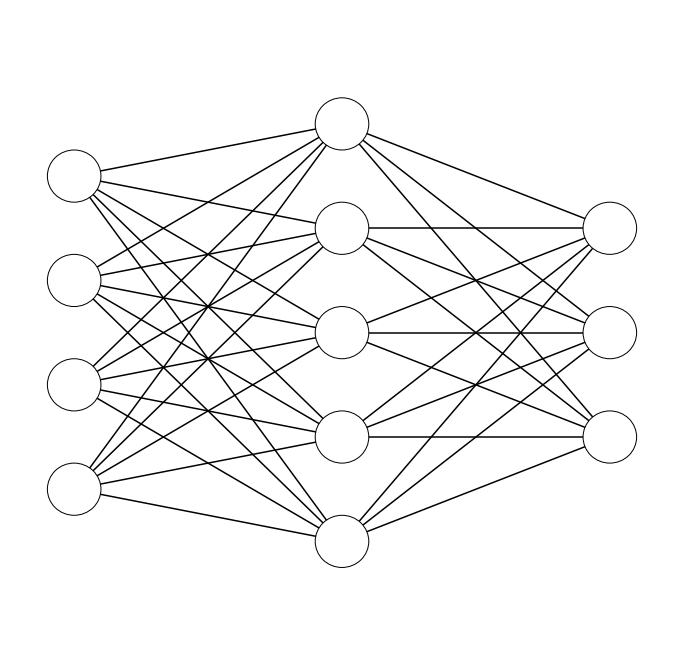

In [26]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [4, 5, 3])

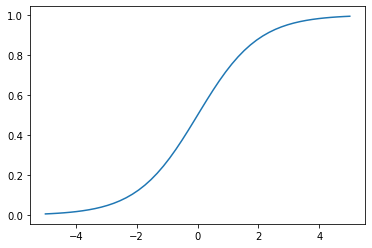

In [27]:
# sigmoid function representation
_x = np.linspace( -5, 5, 50 )
_y = 1 / ( 1 + np.exp( -_x ) )
plt.plot( _x, _y )

In [28]:
learning_rate = 0.2 # slowly update the network
error = []
for epoch in range(1000):
    # activate the first layer using the input
    #   matrix multiplication between the input and the layer 1 weights
    #   result is fed into a sigmoid function
    l1 = 1/(1 + np.exp(-(np.dot(X, w1))))
    # activate the second layer using first layer as input
    l2 = 1/(1 + np.exp(-(np.dot(l1, w2))))
    # find the average errorof this batch
    #   using absolute, can use use square as well
    er = (abs(y - l2)).mean()
    error.append(er)
    
    # BACKPROPAGATION / learning!
    # find contribution of error on each weight on the second layer
    l2_delta = (y - l2)*(l2 * (1-l2))
    # update each weight in the second layer slowly
    w2 += l1.T.dot(l2_delta) * learning_rate
    
    # find contribution of error on each weight on the second layer w.r.t the first layer
    l1_delta = l2_delta.dot(w2.T) * (l1 * (1-l1))
    # udpate weights in the first layer
    w1 += X.T.dot(l1_delta) * learning_rate
    print('Error:', er)

Error: 0.5095088753176048
Error: 0.3712628442115816
Error: 0.4268430307375822
Error: 0.38863875227464945
Error: 0.420477721422614
Error: 0.3674970667073096
Error: 0.33680928390641474
Error: 0.37210581506598067
Error: 0.3226770115515812
Error: 0.3274253996244917
Error: 0.32631326712316117
Error: 0.26417992050850375
Error: 0.26535713637353003
Error: 0.27912946712551234
Error: 0.28188603411253493
Error: 0.25900595485748185
Error: 0.2830445375533258
Error: 0.25320191571016887
Error: 0.2659375793879125
Error: 0.2688511288216798
Error: 0.262033517459633
Error: 0.26523604963444686
Error: 0.26241852248092956
Error: 0.25636679911196103
Error: 0.27496170977202516
Error: 0.24256727897777558
Error: 0.23952917139748978
Error: 0.2691513363155455
Error: 0.2367698769738374
Error: 0.2636583055083114
Error: 0.24093173744788532
Error: 0.27467809308730423
Error: 0.23091730589903434
Error: 0.24832588364710576
Error: 0.2621293541272701
Error: 0.2385085811907717
Error: 0.2352645221245758
Error: 0.26916498902

Error: 0.18238560709458748
Error: 0.15749883259265499
Error: 0.17121760635244423
Error: 0.15067283637983292
Error: 0.17246607968363972
Error: 0.14020332005259825
Error: 0.1794001793362431
Error: 0.18246689652865716
Error: 0.15525118251684122
Error: 0.17151498935436285
Error: 0.17011519610186326
Error: 0.1874162102383676
Error: 0.16756559409394872
Error: 0.14447840234445172
Error: 0.15143623577734416
Error: 0.17103934325290898
Error: 0.14310072781862074
Error: 0.1952068156374885
Error: 0.1660646982650258
Error: 0.1928018553531679
Error: 0.16121970414254394
Error: 0.1821911319024331
Error: 0.17678141372239617
Error: 0.17076067519170537
Error: 0.18366812879705652
Error: 0.16192713222835264
Error: 0.15911692914045888
Error: 0.15563098960141028
Error: 0.1384192413228676
Error: 0.16103424671156075
Error: 0.15703959746457297
Error: 0.18068517898559538
Error: 0.1431515356458082
Error: 0.14160754482839605
Error: 0.1388947741041419
Error: 0.13852720105475338
Error: 0.1408894525424093
Error: 0.16

Error: 0.11891968025049526
Error: 0.12038939020052243
Error: 0.11852863285643936
Error: 0.12012006134334707
Error: 0.11814408162186928
Error: 0.11985655191582326
Error: 0.11776702745756004
Error: 0.11959953654373513
Error: 0.11739853734930043
Error: 0.1193497424389281
Error: 0.11703974516009284
Error: 0.11910794087819927
Error: 0.1166918354908485
Error: 0.1188749397956648
Error: 0.11635602993702734
Error: 0.11865157210949104
Error: 0.11603356704821897
Error: 0.11843868201410723
Error: 0.11572567998526137
Error: 0.11823710835741406
Error: 0.11543357060024145
Error: 0.1180476657289344
Error: 0.11515838119987631
Error: 0.11787112344299776
Error: 0.11490116440411607
Error: 0.1177081829459133
Error: 0.11466285202372116
Error: 0.11755945414532709
Error: 0.11444422371175765
Error: 0.11742543119942518
Error: 0.11424587611654421
Error: 0.11730646820604552
Error: 0.11406819301636952
Error: 0.11720275506379155
Error: 0.11391131659666616
Error: 0.11711429351168705
Error: 0.11377511960051151
Error:

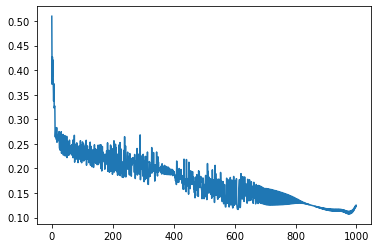

In [29]:
plt.plot(error)

## Prediction

In [30]:
X = test.values[:,:4]
y = np.array([targets[int(x)] for x in test.values[:,4:5]])

l1 = 1/(1 + np.exp(-(np.dot(X, w1))))
l2 = 1/(1 + np.exp(-(np.dot(l1, w2))))

np.round(l2,3)

array([[0.998, 0.   , 0.005],
       [0.998, 0.001, 0.003],
       [0.998, 0.   , 0.014],
       [0.997, 0.001, 0.003],
       [0.998, 0.   , 0.005],
       [0.996, 0.001, 0.003],
       [0.   , 0.127, 0.873],
       [0.   , 0.969, 0.24 ],
       [0.   , 0.181, 0.579],
       [0.   , 0.434, 0.756],
       [0.   , 0.182, 0.641],
       [0.   , 0.059, 0.94 ],
       [0.   , 0.586, 0.565],
       [0.   , 0.4  , 0.327],
       [0.   , 0.016, 0.973],
       [0.   , 0.198, 0.868],
       [0.   , 0.016, 0.973],
       [0.   , 0.027, 0.964],
       [0.   , 0.014, 0.975]])

In [31]:
yp = np.argmax(l2, axis=1) # prediction
res = yp == np.argmax(y, axis=1)
correct = np.sum(res)/len(res)

testres = test[['Species']].replace([0,1,2], ['Iris-setosa','Iris-versicolor','Iris-virginica'])

testres['Prediction'] = yp
testres['Prediction'] = testres['Prediction'].replace([0,1,2], ['Iris-setosa','Iris-versicolor','Iris-virginica'])

print(testres)
print('Correct:',sum(res),'/',len(res), ':', (correct*100),'%')

             Species       Prediction
0        Iris-setosa      Iris-setosa
6        Iris-setosa      Iris-setosa
15       Iris-setosa      Iris-setosa
26       Iris-setosa      Iris-setosa
40       Iris-setosa      Iris-setosa
43       Iris-setosa      Iris-setosa
59   Iris-versicolor   Iris-virginica
60   Iris-versicolor  Iris-versicolor
61   Iris-versicolor   Iris-virginica
62   Iris-versicolor   Iris-virginica
71   Iris-versicolor   Iris-virginica
72   Iris-versicolor   Iris-virginica
81   Iris-versicolor  Iris-versicolor
84   Iris-versicolor  Iris-versicolor
102   Iris-virginica   Iris-virginica
106   Iris-virginica   Iris-virginica
112   Iris-virginica   Iris-virginica
121   Iris-virginica   Iris-virginica
140   Iris-virginica   Iris-virginica
Correct: 14 / 19 : 73.68421052631578 %
